In [80]:
## We have performed sentiment analysis using Rstudio on "Royal wedding" earlier. 
## We will use the same csv file to perform sentiment analysis in python using textblob  

In [2]:
import fileinput
import re
import pandas as pd
from textblob import *

import nltk
nltk.download('all')
from nltk import *
import operator
import csv

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Vivek\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Vivek\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Vivek\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Vivek\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\Vivek\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\V

In [5]:
import os
os.getcwd()


'C:\\Users\\Vivek'

In [6]:
os.chdir('C:\\Users\\Vivek\\Desktop')

In [7]:
# Intialize an empty list to hold all of our tweets
tweets = []


In [8]:
# A helper function that removes all the non ASCII characters
# from the given string. Retuns a string with only ASCII characters.
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)


In [83]:
# LOAD AND CLEAN DATA

# Load in the input file and process each row at a time.
# We assume that the file has three columns:
# 0. The tweet text.
# 1. The tweet ID.
# 2. The tweet publish date
#
# We create a data structure for each tweet:
#
# id:       The ID of the tweet
# pubdate:  The publication date of the tweet
# orig:     The original, unpreprocessed string of characters
# clean:    The preprocessed string of characters
# TextBlob: The TextBlob object, created from the 'clean' string


    
 
import codecs
with codecs.open('Royalwedding.csv',) as csvfile:
#with open('Royal_wedding.csv','rb') as csvfile:
    reade = csv.reader(csvfile, delimiter=',')
    next(reade)
    for row in reade:
        tweet= dict()
        tweet['text'] = row[0]
        tweet['id'] = int(row[1])
        #tweet['created'] = int(row[1])

        # Ignore retweets
        if re.match(r'^RT.*', tweet['text']):
            continue

        tweet['clean'] = tweet['text']

        # Remove all non-ascii characters
        tweet['clean'] = strip_non_ascii(tweet['clean'])

        # Normalize case
        tweet['clean'] = tweet['clean'].lower()

        # Remove URLS. (I stole this regex from the internet.)
        tweet['clean'] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet['clean'])
        # Fix classic tweet lingo
        tweet['clean'] = re.sub(r'\bthats\b', 'that is', tweet['clean'])
        tweet['clean'] = re.sub(r'\bive\b', 'i have', tweet['clean'])
        tweet['clean'] = re.sub(r'\bim\b', 'i am', tweet['clean'])
        tweet['clean'] = re.sub(r'\bya\b', 'yeah', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcant\b', 'can not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwont\b', 'will not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bid\b', 'i would', tweet['clean'])
        tweet['clean'] = re.sub(r'wtf', 'what the fuck', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwth\b', 'what the hell', tweet['clean'])
        tweet['clean'] = re.sub(r'\br\b', 'are', tweet['clean'])
        tweet['clean'] = re.sub(r'\bu\b', 'you', tweet['clean'])
        tweet['clean'] = re.sub(r'\bk\b', 'OK', tweet['clean'])
        tweet['clean'] = re.sub(r'\bsux\b', 'sucks', tweet['clean'])
        tweet['clean'] = re.sub(r'\bno+\b', 'no', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcoo+\b', 'cool', tweet['clean'])

        #Emoticons?
        #NOTE: Turns out that TextBlob already handles emoticons well, so the
        #following is not actually needed.
        #See http://www.datagenetics.com/blog/october52012/index.html
        # tweet['clean'] = re.sub(r'\b:\)\b', 'good', tweet['clean'])
        # tweet['clean'] = re.sub(r'\b:D\b', 'good', tweet['clean'])
        # tweet['clean'] = re.sub(r'\b:\(\b', 'sad', tweet['clean'])
        # tweet['clean'] = re.sub(r'\b:-\)\b', 'good', tweet['clean'])
        # tweet['clean'] = re.sub(r'\b=\)\b', 'good', tweet['clean'])
        # tweet['clean'] = re.sub(r'\b\(:\b', 'good', tweet['clean'])
        # tweet['clean'] = re.sub(r'\b:\\\b', 'annoyed', tweet['clean'])

        # Create textblob object
        tweet['TextBlob'] = TextBlob(tweet['clean'])

        # Correct spelling (WARNING: SLOW)
        #tweet['TextBlob'] = tweet['TextBlob'].correct()

        tweets.append(tweet)
        

In [71]:
# DEVELOP MODELS

for tweet in tweets:
    tweet['polarity'] = float(tweet['TextBlob'].sentiment.polarity)
    tweet['subjectivity'] = float(tweet['TextBlob'].sentiment.subjectivity)

    if tweet['polarity'] >= 0.1:
        tweet['sentiment'] = 'positive'
    elif tweet['polarity'] <= -0.1:
        tweet['sentiment'] = 'negative'
    else:
        tweet['sentiment'] = 'neutral'

tweets_sorted = sorted(tweets, key=lambda k: k['polarity'])


In [77]:
# EVALUATE RESULTS
#WE will also print tweets

negative_tweets = [d for d in tweets_sorted if d['sentiment'] == 'negative']
for tweet in negative_tweets[0:100]:
    print("clean=%s"%(tweet['clean']))
print("\n \n \n end of negative comments \n \n \n") 
positive_tweets = [d for d in tweets_sorted if d['sentiment'] == 'positive']
for tweet in positive_tweets[0:100]:
    print("clean=%s"%(tweet['clean']))
print("\n \n \n end of positive comments \n \n \n") 
neutral_tweets = [d for d in tweets_sorted if d['sentiment'] == 'neutral']
for tweet in neutral_tweets[0:100]:
    print("clean=%s"%(tweet['clean']))
print("\n \n \n end of neutral comments \n \n \n") 


clean=harry and meghan's wedding hiding a horrible truth for catholics #royalwedding 
clean=twitter is calling meghan markle's wedding gown "ill-fitting" and "boring"  via @goodhousemag
clean=harry and meghan's wedding hiding a horrible truth for catholics #royalwedding 
clean=twitter is calling meghan markle's wedding gown "ill-fitting" and "boring"  via @goodhousemag
clean=embroidered into meghan markles veil was britains bid to celebrate its bloody colonial history  via @scroll_in
clean=embroidered into meghan markles veil was britains bid to celebrate its bloody colonial history 
clean=embroidered into meghan markles veil was britains bid to celebrate its bloody colonial history  via @scroll_in
clean=embroidered into meghan markles veil was britains bid to celebrate its bloody colonial history 
clean=lolz! @jkcorden explains that awkward expression he had on during the #royalwedding! 
clean=lolz! @jkcorden explains that awkward expression he had on during the #royalwedding! 
clean=

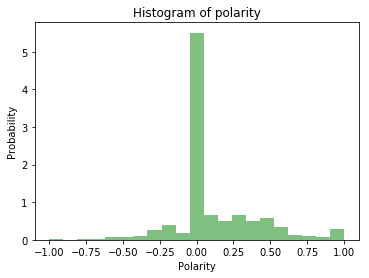

In [78]:
# Next, create some plots

# A histogram of the scores.
x = [d['polarity'] for d in tweets_sorted]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Probability')
plt.title(r'Histogram of polarity')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()


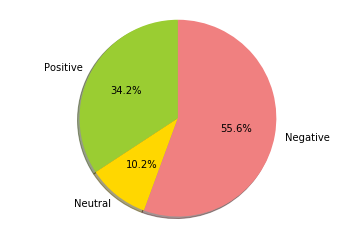

In [81]:
# A pie chart showing the number of tweets in each sentiment category

pos = len(positive_tweets)
neu = len(negative_tweets)
neg = len(neutral_tweets)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()
